# Загрузка данных

In [12]:
!pip install -q wldhx.yadisk-direct
!curl -L $(yadisk-direct https://disk.yandex.ru/d/Ihh18yf4807QPA) -o data.zip
!unzip data.zip

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np


In [18]:
df = pd.read_csv('final_dataset.csv' )

In [37]:
df.sample(5)

,title,text,topic,date
560010,Назарбаев призвал создать новую наднациональну...,Государства-члены ООН должны объединить свои у...,Бывший СССР,2015/09/28
499784,Мультипликатор «Трио из Бельвилля» снял францу...,"Французский режиссер Сильвен Шомэ, поставивший...",Культура,2014/03/07
386689,"МИД РФ узнал о новой ""авантюре"" Грузии в Южной...",Министерство иностранных дел России 23 августа...,Бывший СССР,2011/08/23
536458,У стадиона дортмундской «Боруссии» нашли бомбу...,Рядом со стадионом дортмундской «Боруссии» «Си...,Спорт,2015/02/26
579565,Оливер Стоун рассказал о препятствиях при рабо...,"Американский режиссер Оливер Стоун, снявший фи...",Культура,2016/03/10


In [66]:
df['year'] = df.date.apply(lambda x: int(x.split('/')[0]))

In [67]:
l = sorted([i for i in Counter(df['year']).items()], key=lambda x: x[0])

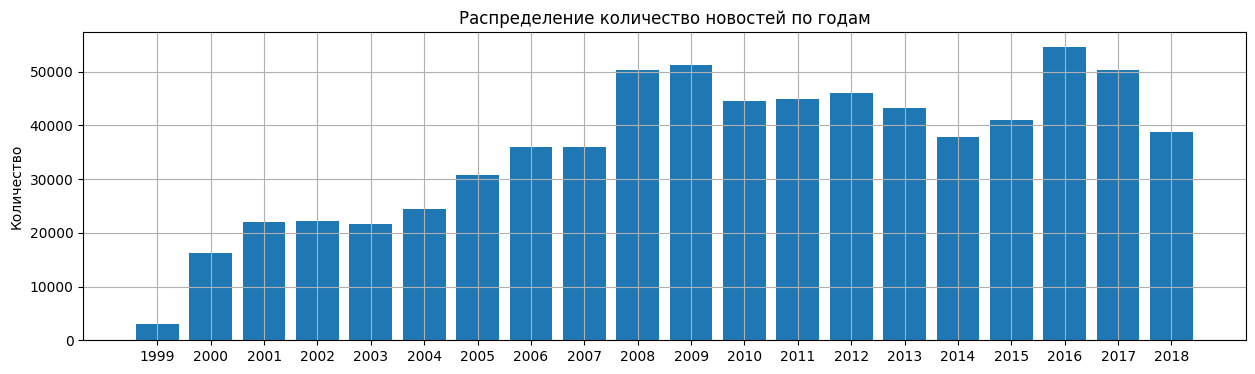

In [68]:
plt.figure(figsize=(15,4))
year = [i[0] for i in l]
counts = [i[1] for i in l]
plt.bar(year, counts,)
plt.ylabel('Количество')
plt.title('Распределение количество новостей по годам')
plt.xticks(range(1999, 2019))
plt.grid()
plt.show()

In [93]:
d = {}
for topic in df.topic.unique():
    cnt = Counter(df.loc[df.topic==topic, 'year'])
    d[topic] = np.array([cnt[k] for k in range(1999, 2019)])

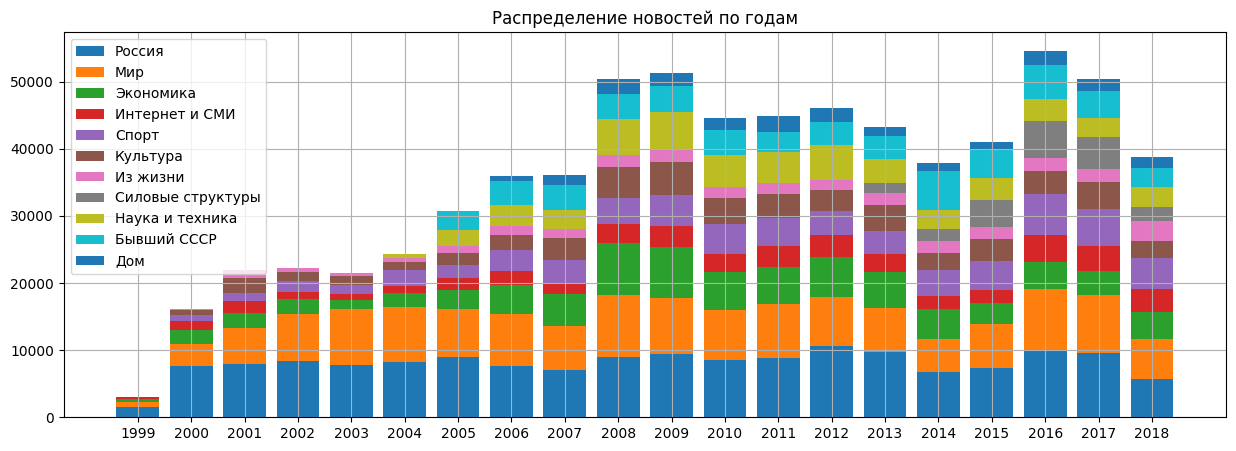

In [104]:
species = list(range(1999, 2019))
weight_counts = d
width = 0.8
fig, ax = plt.subplots(figsize=(15,5))
bottom = np.zeros(20)
for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count
ax.set_title("Распределение новостей по годам")
ax.legend()
ax.set_xticks(range(1999, 2019))
plt.grid()
plt.show()